In [27]:
import seaborn as sns
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(style="darkgrid")

In [172]:
# THIS LOADS THE RIGHT DATA IN THE RIGHT SHAPE
simulation_mean_df = pd.read_json('RESULTS_MMA_5000.json')
simulation_mean_df = simulation_mean_df.iloc[0:]
num_rows, num_cols = simulation_mean_df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

simulation_mean_df.head()



Number of rows: 20
Number of columns: 100


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.600337,0.606324,0.610240,0.605361,0.624001,0.626253,0.602164,0.620080,0.568947,0.612985,...,0.619409,0.615331,0.593238,0.610224,0.602298,0.600868,0.583886,0.599735,0.620298,0.599648
1,0.522255,0.512668,0.536450,0.517701,0.496518,0.534260,0.525142,0.533420,0.515040,0.511596,...,0.527536,0.518727,0.493742,0.529732,0.526767,0.525441,0.517870,0.527020,0.512186,0.516578
2,0.501864,0.505288,0.501767,0.503073,0.467616,0.506051,0.492539,0.510926,0.491773,0.496264,...,0.488189,0.493415,0.472643,0.506365,0.498098,0.504527,0.503705,0.505207,0.501195,0.506821
3,0.464987,0.494595,0.492174,0.497004,0.460120,0.496417,0.486904,0.503203,0.484232,0.493990,...,0.481913,0.486765,0.465250,0.500636,0.498129,0.499946,0.487030,0.497821,0.487932,0.499317
4,0.461915,0.491966,0.488139,0.494410,0.473392,0.492885,0.484470,0.499154,0.490354,0.493348,...,0.479742,0.483869,0.461060,0.498742,0.497400,0.497113,0.482398,0.493081,0.484497,0.496386


In [173]:
# The following plot shows the waiting times for all the festival goers for each number of servers in the system

df_melted = pd.melt(simulation_mean_df, value_name="Average Waiting Time", ignore_index=False)
# sns.scatterplot(data=df_melted, x=df_melted.index, y="Waiting Time")
 # this switches the x-axis labels to strat from 1 instead of 0

print(df_melted)

print(df_melted.index)



    variable  Average Waiting Time
0          0              0.600337
1          0              0.522255
2          0              0.501864
3          0              0.464987
4          0              0.461915
..       ...                   ...
15        99              0.466316
16        99              0.466316
17        99              0.497745
18        99              0.497745
19        99              0.497745

[2000 rows x 2 columns]
Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       ...
       10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
      dtype='int64', length=2000)


In [174]:
df_melted.index = df_melted.index + 1
# to switch the start on the axis to 1 instead of zero, only run ONCE

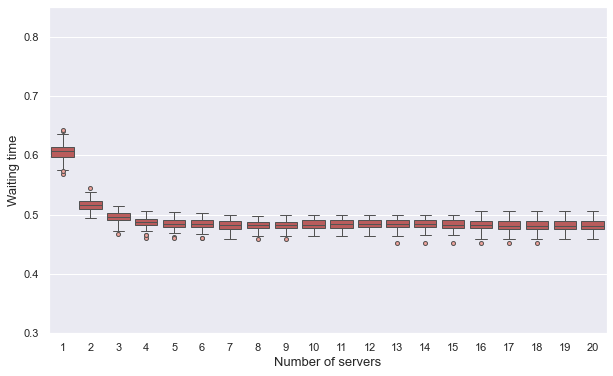

0.6059235287920001
0.516678059126
0.49594544584699995
0.487380230945
0.4849143419790001
0.48372511043099997
0.482628210317
0.482231556121
0.4821348619579999
0.4830737211800001
0.483918563207
0.484852355149
0.4842588723399999
0.484470450253
0.483594637307
0.48259456624999997
0.48207587284799996
0.48229650031700005
0.48219916349
0.4822673782860001


In [175]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df_melted, x=df_melted.index, y="Average Waiting Time", color="#c94c4c",  flierprops=dict( marker='o', markersize=4, markerfacecolor="#eea29a"))

ax.set_ylim(0.30, 0.85)

plt.xlabel("Number of servers", fontsize=13)  
plt.ylabel("Waiting time", fontsize=13)  

plt.show()

for row in simulation_mean_df.index:
    print(np.mean(simulation_mean_df.iloc[row]))

#plt.savefig("SSDA_200_boxplot_full.png", format="png")


<Figure size 720x432 with 0 Axes>

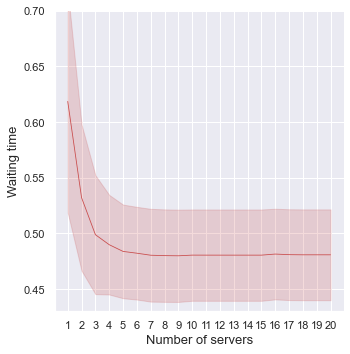

In [126]:
# plt.figure(figsize=(10, 6))
# g = sns.relplot(x=df_melted.index, y="Average Waiting Time", 
#              data=df_melted, kind="line", errorbar="sd", color="#c94c4c", linewidth=0.8) #color="#034f84") HOW MANY STANDARD DEVIATIONS -> ONE FROM THE MEAN

# ax = g.axes[0,0]
# ax.set_ylim(0.43, 0.7)
# ax.set_yticks([0.45, 0.5, 0.55, 0.6, 0.65, 0.7])

# plt.xlabel("Number of servers", fontsize=13)
# plt.ylabel("Waiting time", fontsize=13)
# plt.xticks(np.arange(1, 21, 1))
# plt.show()

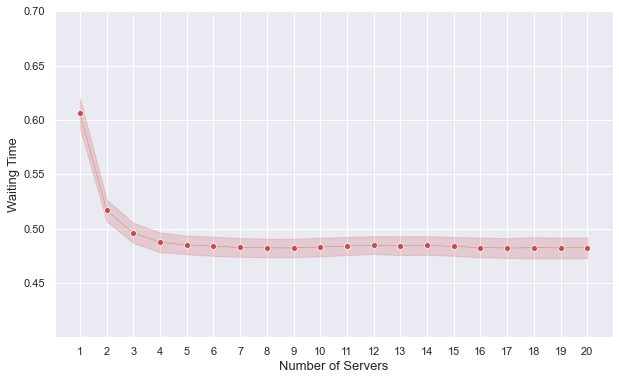

In [176]:
plt.figure(figsize=(10, 6))
h = sns.lineplot(x=df_melted.index, y='Average Waiting Time', data=df_melted, marker='o', errorbar="sd", linewidth=0.3, color="#c94c4c")
#plt.title("Waiting Time per Server for Different Number of Servers")

ax = h.axes
ax.set_ylim(0.40, 0.7)
ax.set_yticks([0.45, 0.5, 0.55, 0.6, 0.65, 0.7])


plt.xlabel("Number of Servers", fontsize=13)
plt.ylabel("Waiting Time", fontsize=13)
plt.xticks(np.arange(1, 21, 1))
plt.show()